# Importing Libraries

In [1]:
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use('ggplot')
%matplotlib inline

from sklearn.cluster import KMeans
from skimage import io

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize'] = (20,12)

# Data Preprocessing

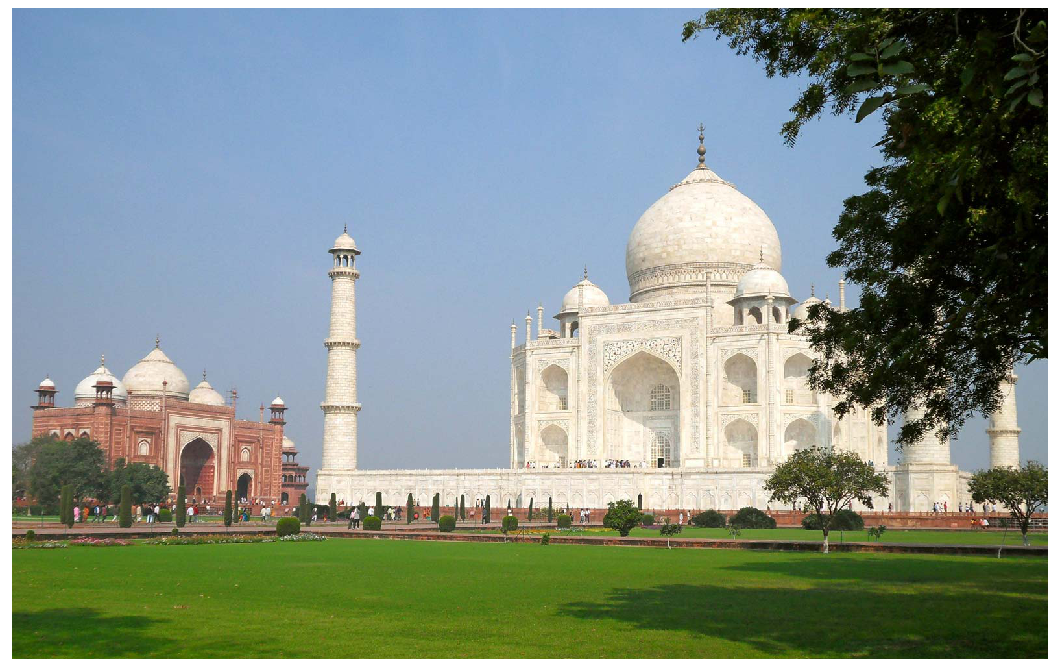

In [3]:
# To read the image and store it as numpy array
img = io.imread('data/taj_mahal.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(img);

In [5]:
print('Shape of the image:',img.shape)

Shape of the image: (1006, 1600, 3)


In [8]:
img_data = (img / 255.0).reshape(-1, 3)
print('Shape of the image array:',img_data.shape)

Shape of the image array: (1609600, 3)


# Visualizing the Color Space

<p> Points Cloud is used for visualization </p>

In [9]:
from plot_utils import plot_utils

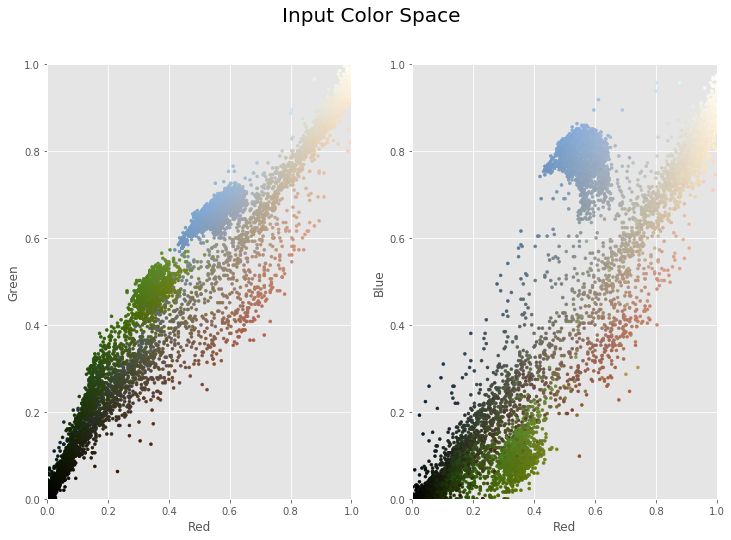

In [10]:
x = plot_utils(img_data, title = 'Input Color Space')
x.colorSpace()

# K Means Clustering

In [11]:
from sklearn.cluster import MiniBatchKMeans

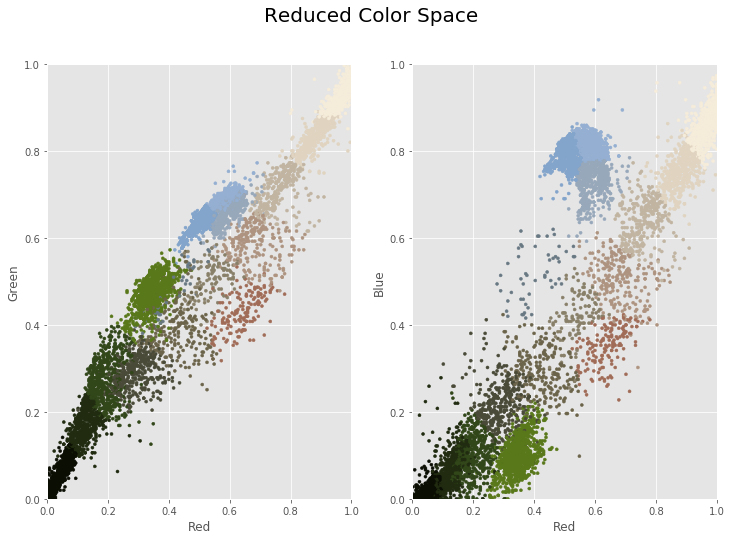

In [13]:
kmeans = MiniBatchKMeans(16).fit(img_data)

#Recoloring each points
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors = k_colors, title='Reduced Color Space')
y.colorSpace()

# Image Compression

#### With Interactive control

In [14]:
img_dir ='data/'

In [20]:
@interact
def colorCompression(image=os.listdir(img_dir), k=IntSlider(min=1, max=256, step=1, value =16,
                                                           continuous_update = False, layout = dict(width='100%'))):
    input_img = io.imread(img_dir+image)
    img_data = (input_img/255.0).reshape(-1,3)
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    k_img = np.reshape(k_colors, (input_img.shape))    # reshpaing the output as shape of input image
    
    #Plotting Results
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle('K-Means Image Compression', fontsize=20)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top = 0.99)   # so titles won't overlap

interactive(children=(Dropdown(description='image', options=('colors.jpg', 'holi.jpg', 'profile_color.jpeg', '…